In [9]:
import os
import time

import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

We aim to identify the minimum and maximum lengths of product names and descriptions, as well as explore the top 50 most frequent words in both columns. To begin, we will load the filtered dataset, which excludes products from non-English-language markets.

In [3]:
start = time.time()
df = pd.read_parquet("../data/filtered_data.parquet", engine="pyarrow", columns=["Pid", "Description", "Name"])
print("Load time: {:.2f} seconds".format(time.time() - start))

Load time: 220.40 seconds


### Check the maximum and minimum length of product descriptions

In [3]:
max_description_length = df['Description'].dropna().str.len().max()
min_description_length = df['Description'].dropna().str.len().min()
print("The maximum description length is: ", max_description_length)
print("The minimum description length is: ", min_description_length)

The maximum description length is:  6098
The minimum description length is:  1


### Check the maximum and minimum length of product names

In [4]:
max_name_length = df['Name'].dropna().str.len().max()
min_name_length = df['Name'].dropna().str.len().min()
print("The maximum name length is: ", max_name_length)
print("The minimum name length is: ", min_name_length)

The maximum name length is:  205
The minimum name length is:  1


### Check the top 50 most frequent words in the product names and descriptions

In [5]:
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply cleaning function to 'Name' and 'Description'
df['Name_clean'] = df['Name'].apply(clean_text)
df['Description_clean'] = df['Description'].apply(clean_text)

In [8]:
# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), top_k=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Plot word cloud
def plot_wordcloud(ngrams_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(ngrams_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

The top 50 most frequent words in product name are:  [('size', np.int64(1422890)), ('womens', np.int64(1374478)), ('black', np.int64(1116106)), ('mens', np.int64(1062010)), ('blue', np.int64(609466)), ('woman', np.int64(527582)), ('cotton', np.int64(511787)), ('temu', np.int64(479243)), ('white', np.int64(466946)), ('tshirt', np.int64(384390)), ('leather', np.int64(377140)), ('dress', np.int64(367048)), ('man', np.int64(340307)), ('edition', np.int64(335097)), ('pants', np.int64(308583)), ('light', np.int64(298907)), ('sleeve', np.int64(284153)), ('set', np.int64(252700)), ('new', np.int64(240685)), ('book', np.int64(226954)), ('gold', np.int64(219845)), ('navy', np.int64(217004)), ('elastane', np.int64(216524)), ('red', np.int64(211633)), ('green', np.int64(210881)), ('jeans', np.int64(207582)), ('shirt', np.int64(204239)), ('polyester', np.int64(199407)), ('block', np.int64(198705)), ('guide', np.int64(191997)), ('macys', np.int64(190718)), ('grey', np.int64(186358)), ('brown', np.in

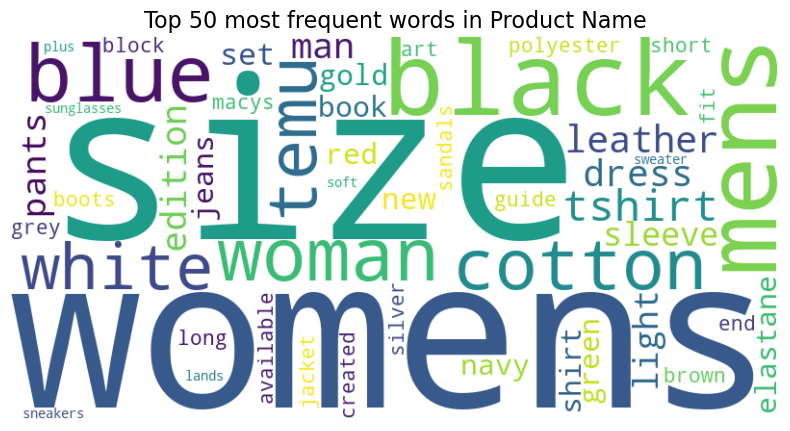

In [9]:
# Analyze Name column
n = 50
name_ngrams = get_top_ngrams(df["Name_clean"], top_k = n)
print(f"The top {n} most frequent words in product name are: ", name_ngrams)
plot_wordcloud(name_ngrams, f"Top {n} most frequent words in Product Name")

The top 50 most frequent words in product description are:  [('book', np.int64(2611938)), ('new', np.int64(2214532)), ('color', np.int64(1942544)), ('size', np.int64(1610374)), ('perfect', np.int64(1281294)), ('condition', np.int64(1163154)), ('style', np.int64(1079744)), ('comfort', np.int64(1015994)), ('fit', np.int64(1008145)), ('life', np.int64(1007781)), ('world', np.int64(847360)), ('features', np.int64(847250)), ('wear', np.int64(845759)), ('look', np.int64(829948)), ('leather', np.int64(827391)), ('collection', np.int64(810492)), ('way', np.int64(808006)), ('design', np.int64(796201)), ('classic', np.int64(760775)), ('solid', np.int64(727720)), ('pages', np.int64(720195)), ('fabric', np.int64(709580)), ('long', np.int64(705084)), ('work', np.int64(702714)), ('time', np.int64(690371)), ('better', np.int64(689978)), ('day', np.int64(679374)), ('logo', np.int64(650608)), ('designed', np.int64(631882)), ('make', np.int64(622795)), ('service', np.int64(622636)), ('history', np.int64

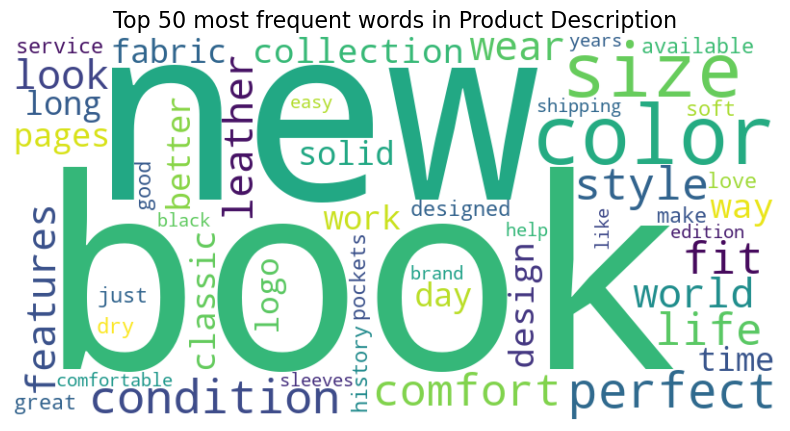

In [10]:
# Analyze Description column
desc_ngrams = get_top_ngrams(df["Description_clean"], top_k = n)
print(f"The top {n} most frequent words in product description are: ", desc_ngrams)
plot_wordcloud(desc_ngrams, f"Top {n} most frequent words in Product Description")

### Check unique values for metadata columns

In [23]:
start = time.time()
df = pd.read_parquet("../data/filtered_data.parquet", engine="pyarrow", columns=["Category", "MergedBrand", "Color", "Size"])
print("Load time: {:.2f} seconds".format(time.time() - start))

Load time: 3.17 seconds


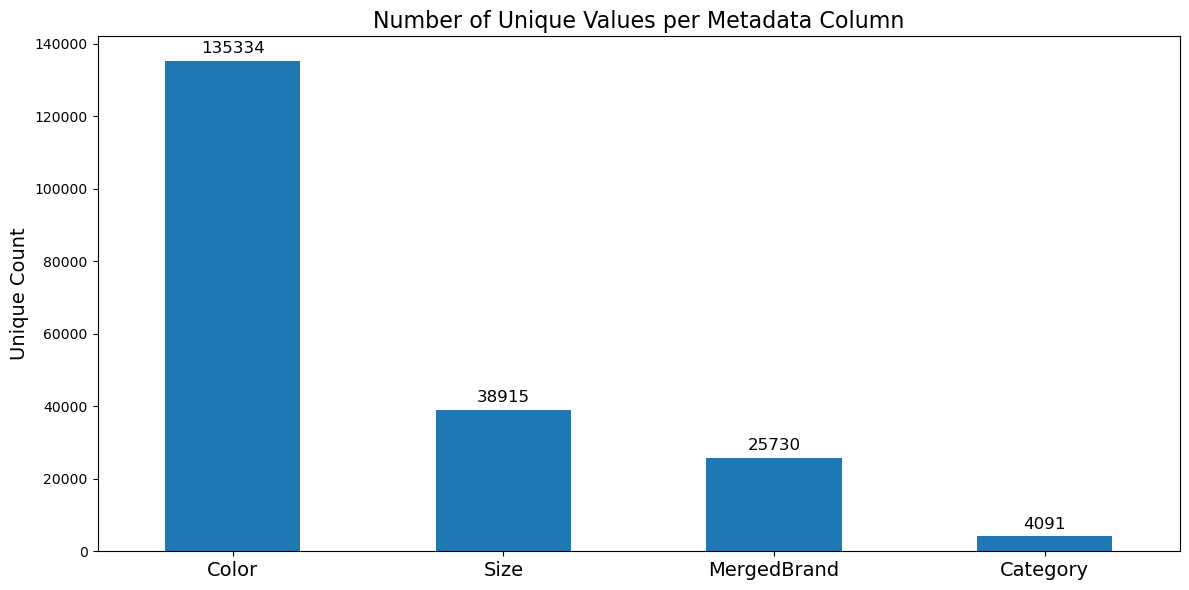

In [27]:
unique_counts = df.nunique().sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(12, 6))
ax = unique_counts.plot(kind='bar')
plt.title("Number of Unique Values per Metadata Column", fontsize=16)
plt.ylabel("Unique Count", fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=14)

# Add value labels on top of each bar
for i, val in enumerate(unique_counts):
    ax.text(i, val + max(unique_counts) * 0.01, str(val), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Check category distribution on full dataset

In [11]:
df = pd.read_parquet("../data/merged_output.parquet", engine="pyarrow", columns=["Category"])

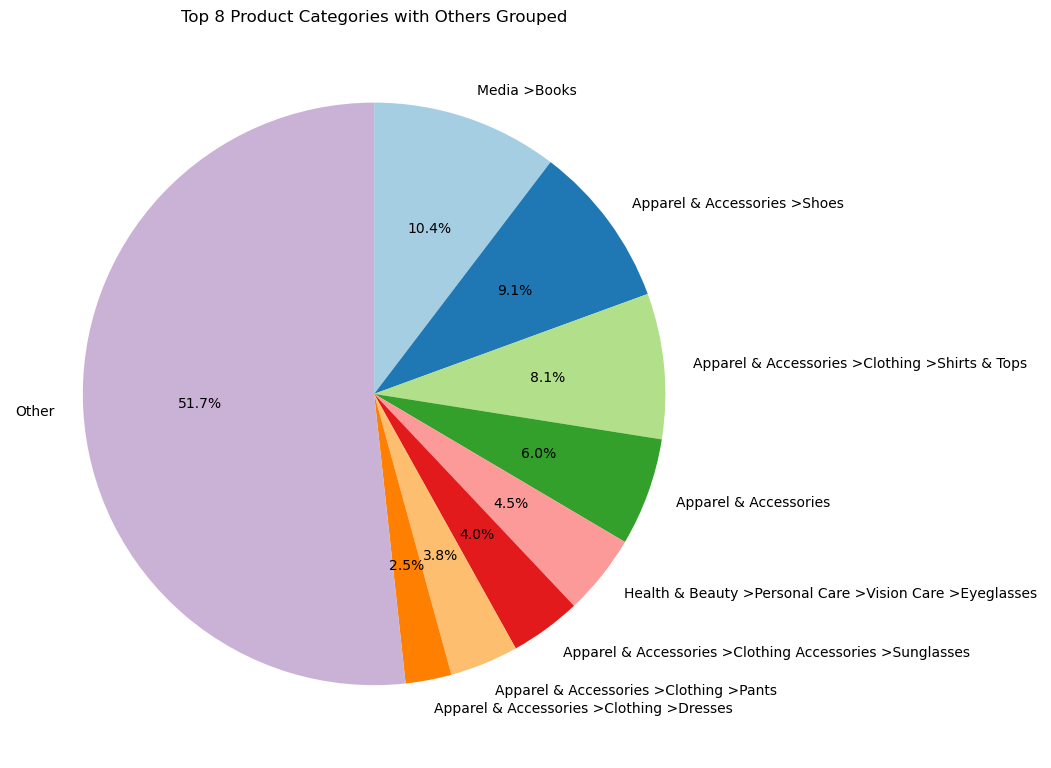

In [19]:
# Count occurrences of each category
category_counts = df["Category"].value_counts()

# Limit to top N categories and group the rest as "Other"
top_n = 8
top_categories = category_counts[:top_n]
others = category_counts[top_n:].sum()
category_data = pd.concat([top_categories, pd.Series({"Other": others})])

# Set a color palette to ensure distinct colors for each category
colors = plt.cm.Paired(range(len(category_data)))

# Plot pie chart with rotated labels and custom colors
plt.figure(figsize=(10, 8))
category_data.plot.pie(autopct="%1.1f%%", startangle=90, counterclock=False, colors=colors)

# Rotate the category labels and set title
plt.title("Top 8 Product Categories with Others Grouped")
plt.ylabel("")  # Hide y-axis label

# Improve layout to avoid overlap
plt.tight_layout()
plt.show()